# Data Mining Group 3
## Members: Moritz Brandl, Lukas Miklautz, Raphael Mitsch

In this notebook we discuss briefly the preprocessing steps we did and how we approached the whole project. As we wanted the project to be coded one language, we recoded the whole sript which was provided in Python. The rationale behind this is to not introduce to many dependencies. You can find the project on [github](https://github.com/univie-datamining-team3/assignment2), but note that this is still work in progress and there is no setup script yet which makes it hard to reproduce.

### Data Gathering
We recorded the three modes WALK, METRO and TRAM. We faced some issues during the recording as we had a varying size of trips for equal recording length. E.g. Raphael's phone recorded only accelerometer and GPS data, so his trips were in the kilobyte range, while the recordings of Moritz and Lukas were in the megabyte range. Another issue was that sometimes the sensors on the phone stopped recording for a few seconds, which resulted in gaps in the recorded data.

### Data Preprocessing
We implemented all the suggested preprocessing steps from the R notebook in Python. Additionally we interpolated the above mentioned gaps. We faced some problems with the paa as the library "pyts", that we used could not handle the large file size. The solution to this problem was to calculate the paa in batch mode. We also found that we have to cut more than 30 seconds from each end of a scripted trip, because the setup took for many trips longer than 30 seconds.

### GPS Plots
Click [here](maps/one_trip.html) to see the plot of one trip

Click [here](maps/heatmap.html) to see the heatmap

In the following you can see some additional information about the recorded trips:

In [1]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys
from dotenv import load_dotenv, find_dotenv

import pandas as pd
import numpy as np
from copy import deepcopy

#Visualisation Libraries
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import seaborn as sns
from datetime import datetime
# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

%aimport data.download
from data.download import DatasetDownloader
%aimport visualization.visualize
from visualization.visualize import plot_track
from visualization.visualize import plot_gps_heatmap
from visualization.visualize import plot_acceleration_sensor
%aimport data.preprocessing
from data.preprocessing import Preprocessor

load_dotenv(find_dotenv())
DatasetDownloader.URL = str(os.environ.get("URL"))
DatasetDownloader.USERNAME = str(os.environ.get("LOGINNAME"))
DatasetDownloader.PASSWORD = str(os.environ.get("LOGINPASSWORD"))

In [2]:
recorded_file_names = DatasetDownloader.get_file_names(os.path.join(DatasetDownloader.get_data_dir(),"raw"))
print("We have recorded: {} trips in total".format(len(recorded_file_names)))

We have recorded: 83 trips


From the recorded trips we have the following distribution of scripted trips:

In [3]:
all_tokens = [os.environ.get("KEY_MORITZ"),
              os.environ.get("KEY_LUKAS"),
              os.environ.get("KEY_RAPHAEL")]

print("scripted trips:")
dfs = Preprocessor.preprocess(all_tokens)

scripted trips:
{'TRAM': 4, 'METRO': 5, 'WALK': 5}
{'TRAM': 5, 'METRO': 6, 'WALK': 5}
{'TRAM': 6, 'METRO': 5, 'WALK': 5}


Below we have a detailed summary for each scripted trip:

For token of Moritz Brandl:

In [4]:
token = os.environ.get("KEY_MORITZ")
trip_info = Preprocessor.get_trip_summaries(dfs[token]["resampled_sensor_data"], convert_time=True)

scripted_mask = [True if "scripted" in str(notes).lower() else False for notes in trip_info["notes"]]
trip_info[scripted_mask].sort_values("mode").reset_index(drop=True)

,time,mode,notes,Start,Stop,trip_length
0,2017-12-11 12:48:06.493,METRO,scripted,2017-12-11 12:48:07.665,2017-12-11 12:59:59.683,00:11:52.018000
1,2017-12-11 13:22:44.907,METRO,scripted,2017-12-11 13:22:45.682,2017-12-11 13:35:49.217,00:13:03.535000
2,2017-12-13 16:23:58.360,METRO,scripted,2017-12-13 16:23:59.126,2017-12-13 16:34:42.562,00:10:43.436000
3,2017-12-13 16:39:33.345,METRO,scripted,2017-12-13 16:39:34.203,2017-12-13 16:50:51.449,00:11:17.246000
4,2017-12-14 06:42:14.162,METRO,scripted,2017-12-14 06:42:14.988,2017-12-14 06:53:05.462,00:10:50.474000
5,2017-12-13 07:02:17.278,TRAM,Scripted,2017-12-13 07:02:17.966,2017-12-13 07:13:23.622,00:11:05.656000
6,2017-12-13 15:39:01.674,TRAM,scripted,2017-12-13 15:39:02.417,2017-12-13 15:49:55.531,00:10:53.114000
7,2017-12-13 15:56:22.677,TRAM,scripted,2017-12-13 15:56:23.455,2017-12-13 16:06:57.928,00:10:34.473000
8,2017-12-13 16:06:59.543,TRAM,scripted,2017-12-13 16:07:00.294,2017-12-13 16:17:37.362,00:10:37.068000
9,2017-12-11 13:50:26.253,WALK,scripted,2017-12-11 13:50:27.039,2017-12-11 14:03:06.326,00:12:39.287000


For token of Lukas Miklautz:

In [5]:
token = os.environ.get("KEY_LUKAS")
trip_info = Preprocessor.get_trip_summaries(dfs[token]["resampled_sensor_data"], convert_time=True)

scripted_mask = [True if "scripted" in str(notes).lower() else False for notes in trip_info["notes"]]
trip_info[scripted_mask].sort_values("mode").reset_index(drop=True)

,time,mode,notes,Start,Stop,trip_length
0,2017-12-11 18:57:55.801,METRO,scripted u2mq,2017-12-11 18:57:55.978,2017-12-11 19:09:41.231,00:11:45.253000
1,2017-12-12 19:38:09.950,METRO,scripted,2017-12-12 19:38:10.099,2017-12-12 19:49:14.433,00:11:04.334000
2,2017-12-12 19:52:41.666,METRO,scripted u6,2017-12-12 19:52:41.792,2017-12-12 20:05:05.142,00:12:23.350000
3,2017-12-13 15:45:26.492,METRO,scripted,2017-12-13 15:45:26.640,2017-12-13 15:55:32.517,00:10:05.877000
4,2017-12-13 16:00:21.042,METRO,scripted u4,2017-12-13 16:00:21.192,2017-12-13 16:10:45.368,00:10:24.176000
5,2017-12-13 16:12:53.146,METRO,scripted u2karlsplatz,2017-12-13 16:12:53.290,2017-12-13 16:24:59.477,00:12:06.187000
6,2017-12-11 13:55:58.520,TRAM,scripted,2017-12-11 13:55:58.654,2017-12-11 14:06:01.795,00:10:03.141000
7,2017-12-12 18:58:13.730,TRAM,scripted,2017-12-12 18:58:13.946,2017-12-12 19:10:07.787,00:11:53.841000
8,2017-12-12 19:10:34.071,TRAM,scripted,2017-12-12 19:10:34.242,2017-12-12 19:22:17.792,00:11:43.550000
9,2017-12-12 19:22:35.014,TRAM,scripted,2017-12-12 19:22:35.144,2017-12-12 19:32:40.312,00:10:05.168000


For token of Raphael Mitsch:

In [6]:
token = os.environ.get("KEY_RAPHAEL")
trip_info = Preprocessor.get_trip_summaries(dfs[token]["resampled_sensor_data"], convert_time=True)

scripted_mask = [True if "scripted" in str(notes).lower() else False for notes in trip_info["notes"]]
trip_info[scripted_mask].sort_values("mode").reset_index(drop=True)

,time,mode,notes,Start,Stop,trip_length
0,2017-12-08 14:48:43.804,METRO,scripted,2017-12-08 14:48:44.143,2017-12-08 14:59:39.862,00:10:55.719000
1,2017-12-09 20:04:36.073,METRO,scripted,2017-12-09 20:04:36.335,2017-12-09 20:15:55.682,00:11:19.347000
2,2017-12-13 12:29:48.860,METRO,scripted,2017-12-13 12:29:49.197,2017-12-13 12:41:34.908,00:11:45.711000
3,2017-12-13 12:42:18.067,METRO,scripted,2017-12-13 12:42:18.315,2017-12-13 12:54:53.549,00:12:35.234000
4,2017-12-13 13:08:50.066,METRO,scripted,2017-12-13 13:08:50.302,2017-12-13 13:23:14.050,00:14:23.748000
5,2017-12-05 16:46:55.136,TRAM,scripted,2017-12-05 16:46:55.635,2017-12-05 17:00:48.895,00:13:53.260000
6,2017-12-07 07:09:14.617,TRAM,scripted,2017-12-07 07:09:15.194,2017-12-07 07:26:03.936,00:16:48.742000
7,2017-12-07 10:25:09.021,TRAM,scripted,2017-12-07 10:25:09.721,2017-12-07 10:38:16.451,00:13:06.730000
8,2017-12-12 14:57:14.405,TRAM,scripted,2017-12-12 14:57:14.698,2017-12-12 15:10:22.116,00:13:07.418000
9,2017-12-13 13:29:04.574,TRAM,scripted,2017-12-13 13:29:04.852,2017-12-13 13:40:05.741,00:11:00.889000


## Plot acceleration of scripted trips per token and per mode

In [14]:
def plot_scripted_acceleration_per_mode(trips, sensor_type="acceleration"):
    modes = {"TRAM":False, "METRO":False, "WALK":False}
    for trip_i in trips:
        mode = trip_i["annotation"]["mode"][0]
        note = trip_i["annotation"]["notes"][0]
        if note is not None and "scripted" in str(note).lower():
            if (mode in modes.keys()) and modes[mode] is False:
                modes[mode] = True
                print("Mode: ", mode)
                print("Note: ", note)
                sensor_data = trip_i["sensor"]
                acceleration = sensor_data[sensor_data["sensor"] == sensor_type]
                print("Number of recordings: ", len(acceleration))
                acceleration= acceleration.set_index("time")
                plot_acceleration_sensor(acceleration)    

Token: 355007075245007
Mode:  METRO
Note:  scripted
Number of recordings:  13651


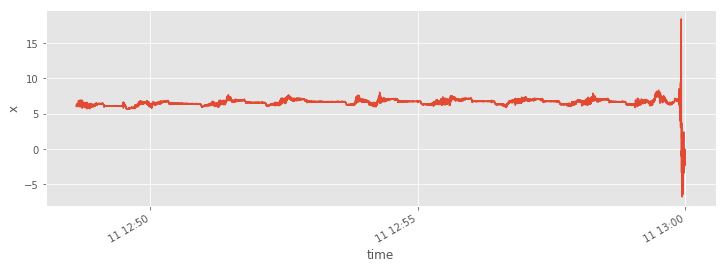

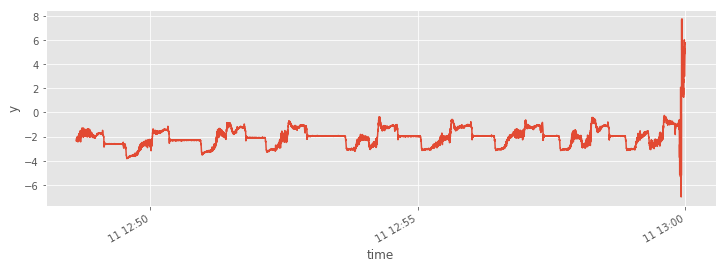

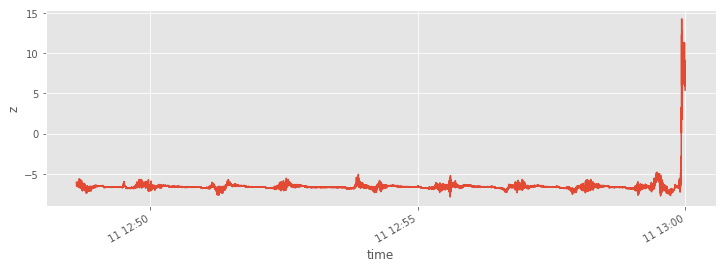

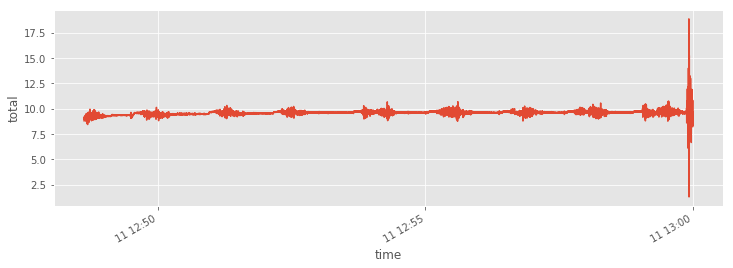

Mode:  WALK
Note:  scripted
Number of recordings:  14604


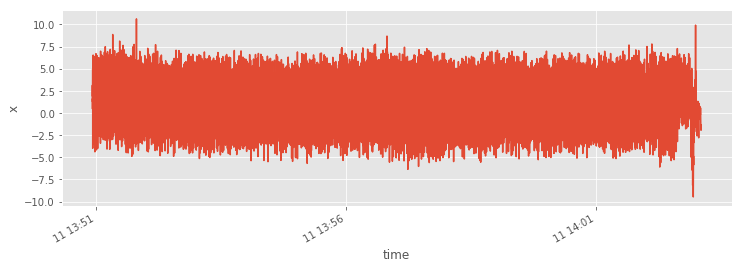

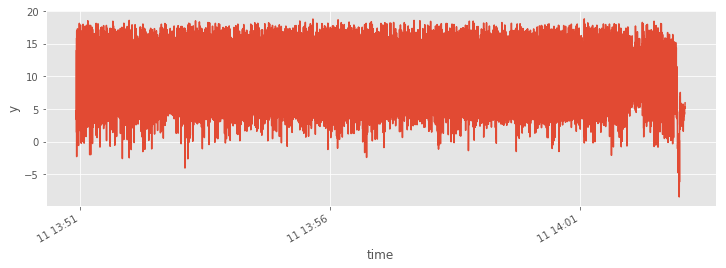

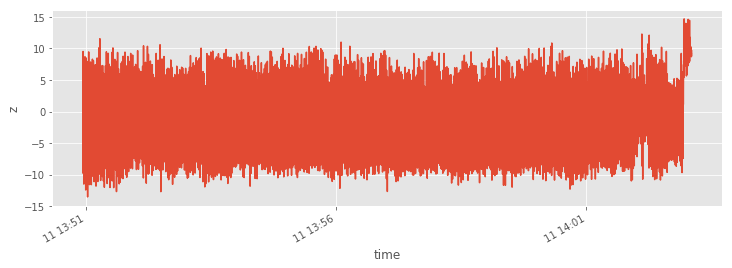

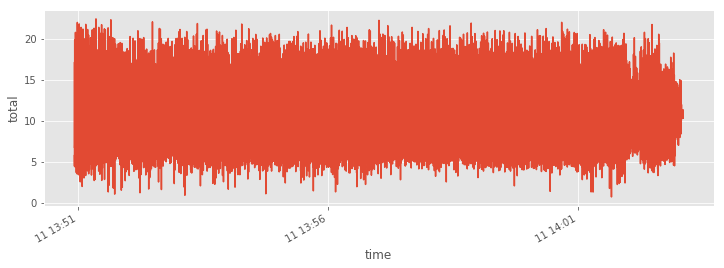

Mode:  TRAM
Note:  Scripted
Number of recordings:  12721


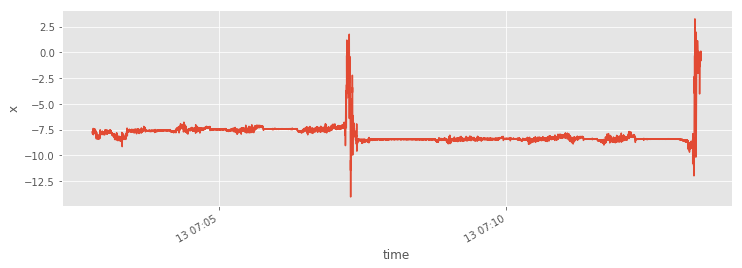

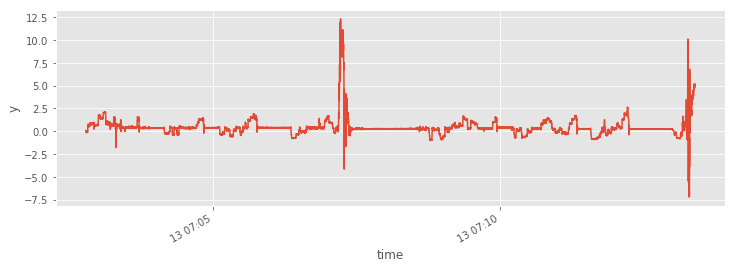

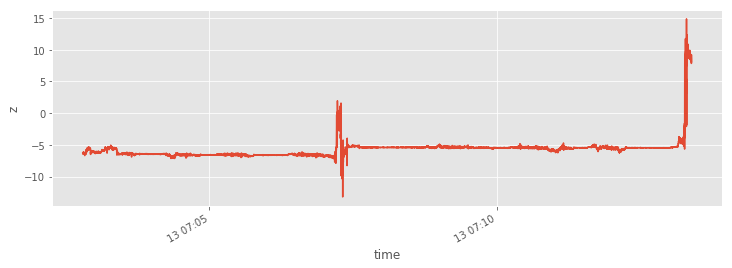

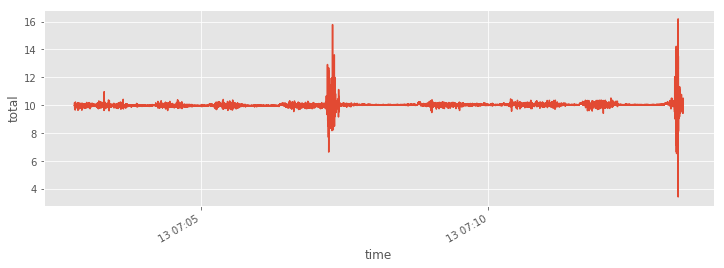

Token: 868049020858898
Mode:  WALK
Note:  scripted
Number of recordings:  12746


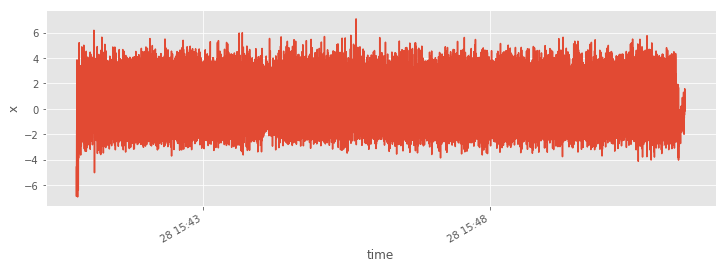

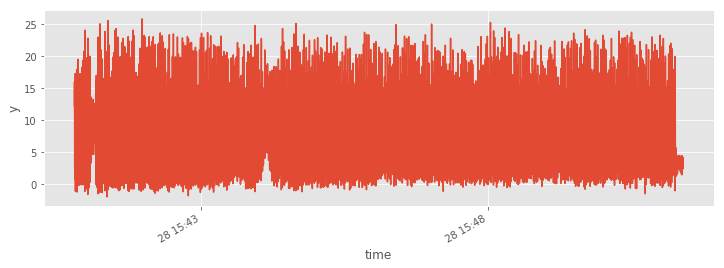

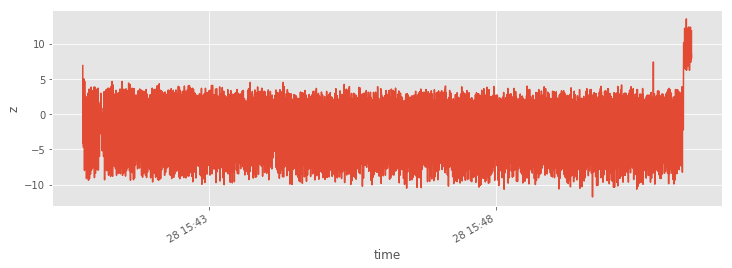

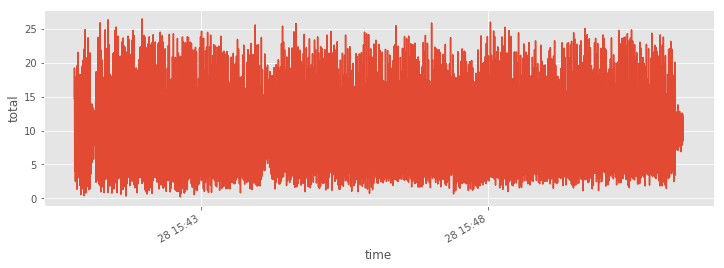

Mode:  TRAM
Note:  scripted
Number of recordings:  11464


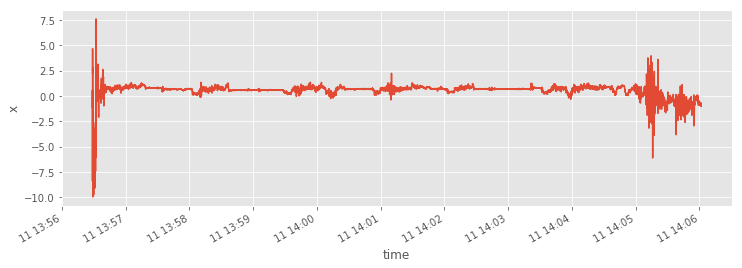

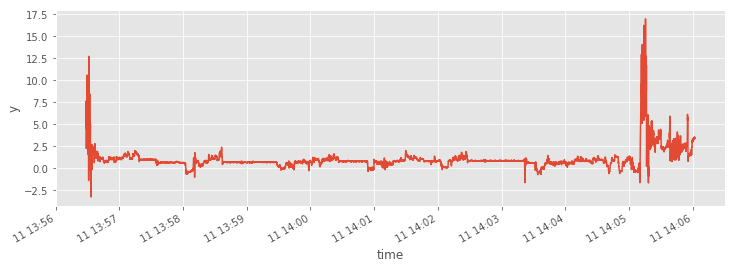

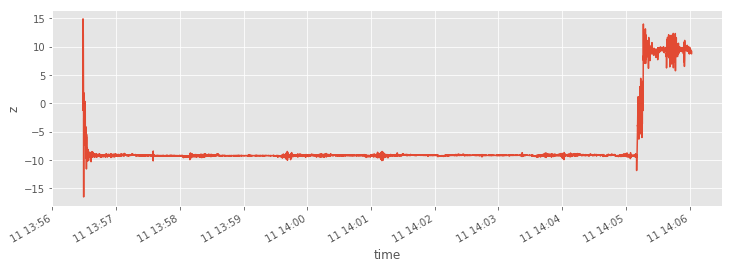

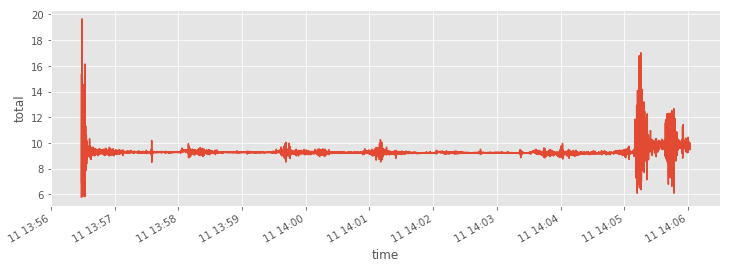

Mode:  METRO
Note:  scripted u2mq
Number of recordings:  13506


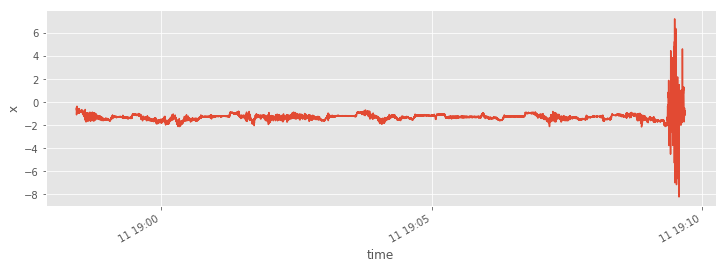

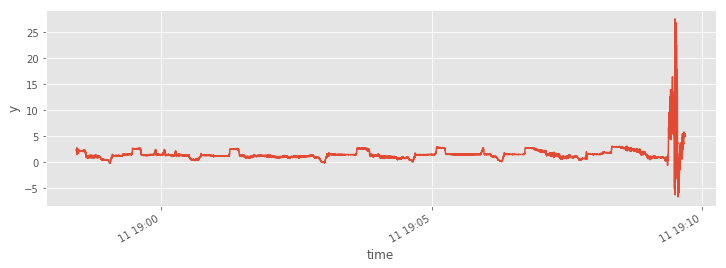

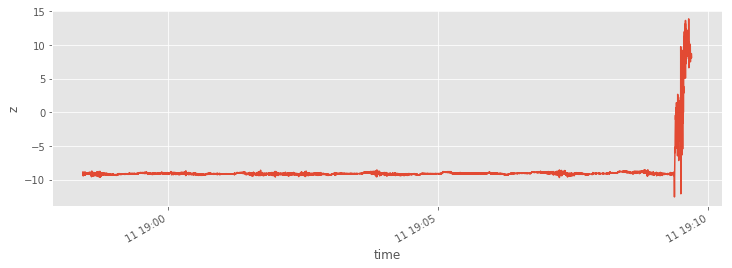

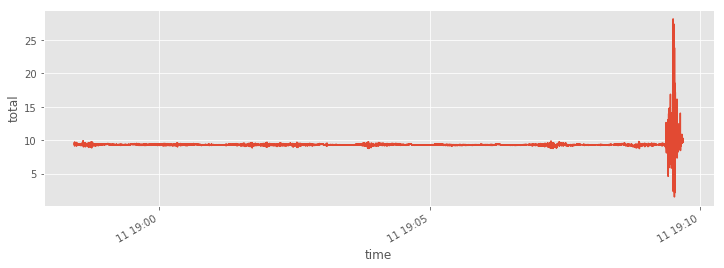

Token: 358568053229914
Mode:  TRAM
Note:  scripted
Number of recordings:  16053


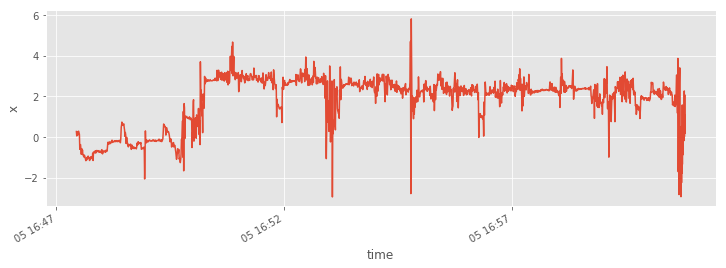

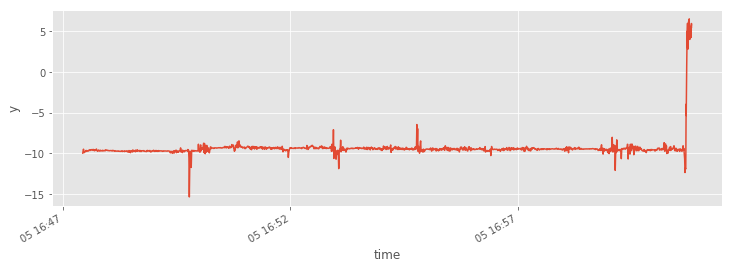

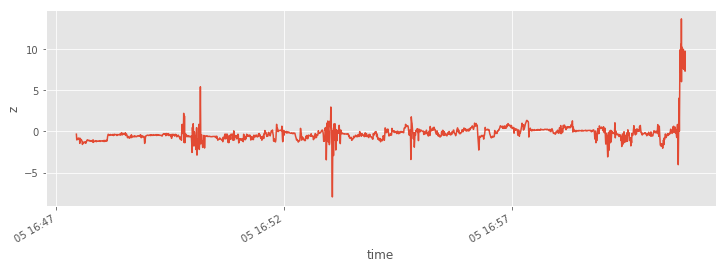

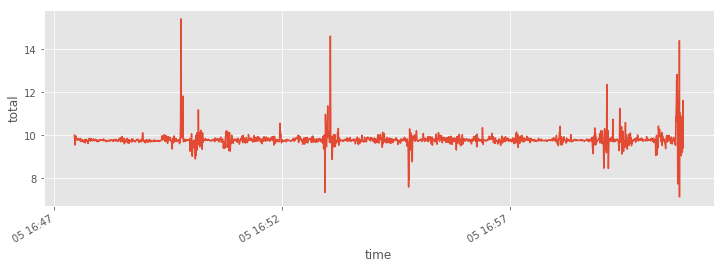

Mode:  WALK
Note:  scripted
Number of recordings:  12855


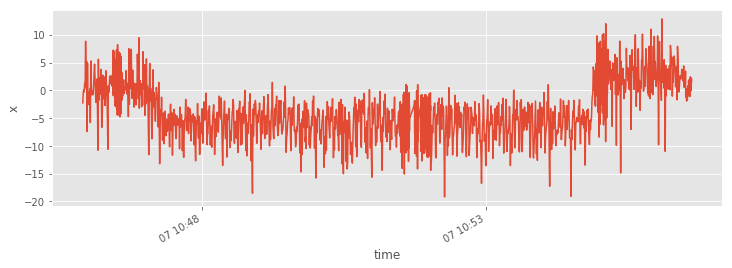

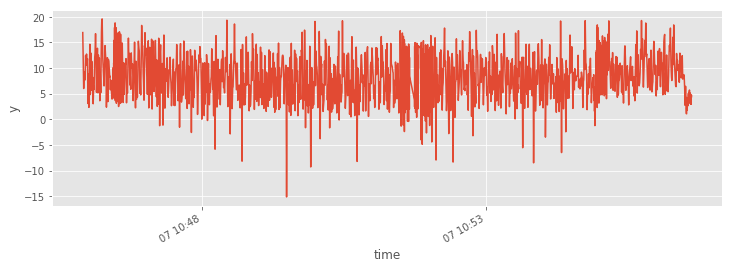

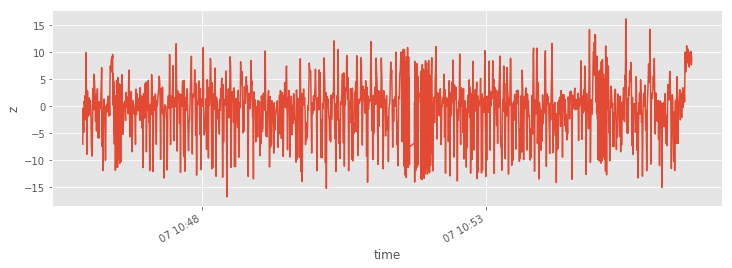

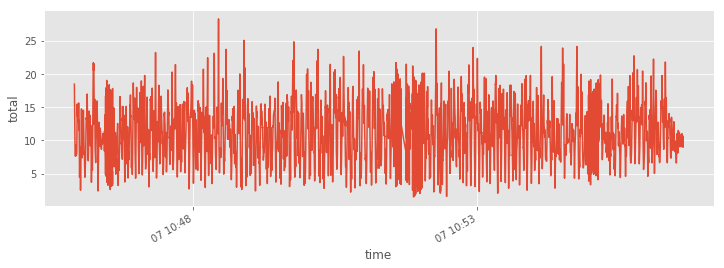

Mode:  METRO
Note:  scripted
Number of recordings:  12511


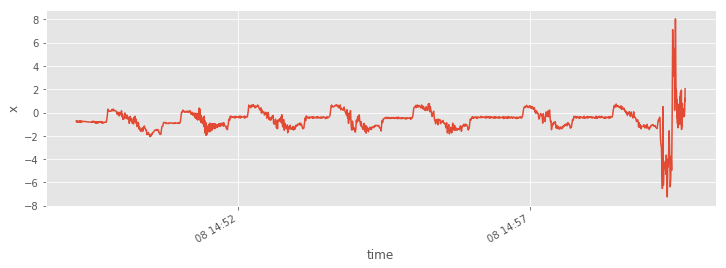

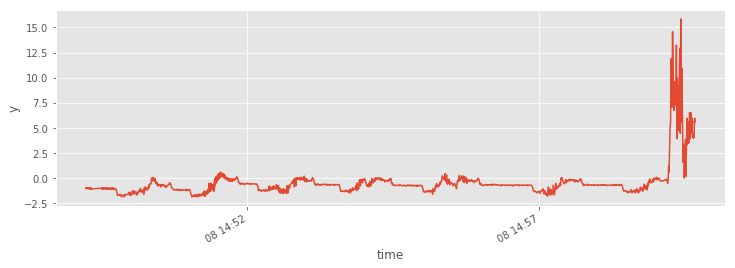

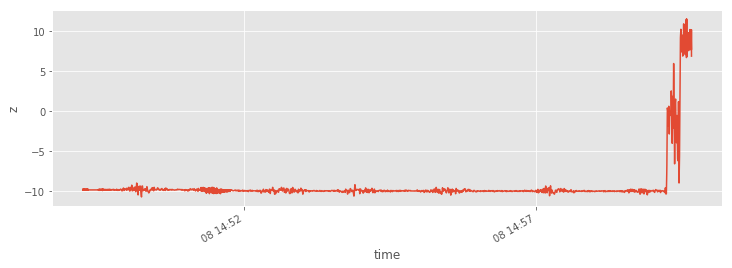

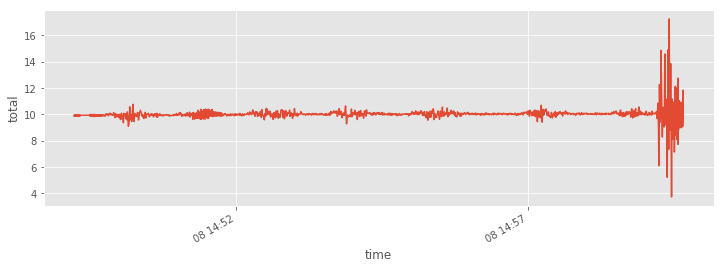

In [17]:
for index, token_i in enumerate(all_tokens):
    print("Token:",token_i)
    plot_scripted_acceleration_per_mode(dfs[token_i]["resampled_sensor_data"])
